In [1]:
using DataFrames
using CSV
using Plots
using Sundials

In [2]:
# 1. Working with files

# 1.1 Read a data file

# First set up the paths
PATH = "./example_datafiles/"
FILE_IN = "data1.csv"

# Then read this to a dataframe
df = CSV.read(string(PATH,FILE_IN))

# 1.2 Write a data file
FILE_OUT = "data3.csv"
CSV.write(string(PATH,FILE_OUT), df)
# NB you can use CSV.write to write dataframes to file
# or writedlm to write arrays 

# Show the dataframe
df

,0,1,2,3,4,5,6
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,-0.388173,-0.147401,0.172834,0.0952229,0.986469,1.87817,1.29702
2,-0.717954,-1.38748,0.25631,-0.642718,0.967369,0.527781,1.1477
3,-0.721229,-0.868733,0.901863,-0.100104,0.0139219,1.02512,-0.494322
4,-2.47705,0.821981,0.050652,0.767555,-2.24463,-0.617112,0.923344
5,0.378843,2.07273,-0.0469991,-0.320351,-0.648165,-0.497145,-1.71117
6,0.318052,-0.268321,0.360677,-0.0543594,-0.323788,-1.50797,-2.14436
7,-1.08296,-0.679227,-0.678381,0.218769,-0.726866,-0.42958,-0.366159
8,0.765638,0.204376,0.795461,0.831841,1.24842,-0.0747787,0.0187541
9,0.0782651,-0.272536,0.985487,-1.15945,-0.374033,-1.21897,3.52371


In [3]:
# 2. Dataframes

# Dataframes are indexed like this: [row,column]
# The colon (:) operator is used to get ranges of elements
# In julia, index values go from one <== very important.

# Examples
# 2.1 The first column
df[:,1]

10-element Array{Float64,1}:
 -0.3881728582140113 
 -0.7179541869051463 
 -0.7212288971426017 
 -2.4770502168681627 
  0.37884332976646407
  0.31805212895989166
 -1.082961862019557  
  0.7656383867591697 
  0.07826508238851418
 -0.522867920147805  

In [4]:
# 2.2 The first row
df[1,:]

,0,1,2,3,4,5,6,7
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,-0.388173,-0.147401,0.172834,0.0952229,0.986469,1.87817,1.29702,-0.41478


In [5]:
# 2.3 The first two columns
df[:,1:2]

,0,1
,Float64,Float64
1,-0.388173,-0.147401
2,-0.717954,-1.38748
3,-0.721229,-0.868733
4,-2.47705,0.821981
5,0.378843,2.07273
6,0.318052,-0.268321
7,-1.08296,-0.679227
8,0.765638,0.204376
9,0.0782651,-0.272536


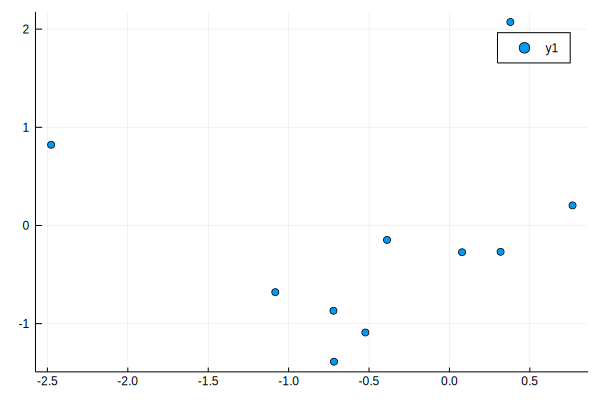

In [6]:
# 3. Plotting

# Plotting requires minimally the following command
# plot(x,y)
# where x and y are the independent and dependent variables
# and must be arrays of the same length

# As an example let's set the first two columns as x and y
x = df[:,1]
y = df[:,2]
plot(x,y, seriestype = :scatter)


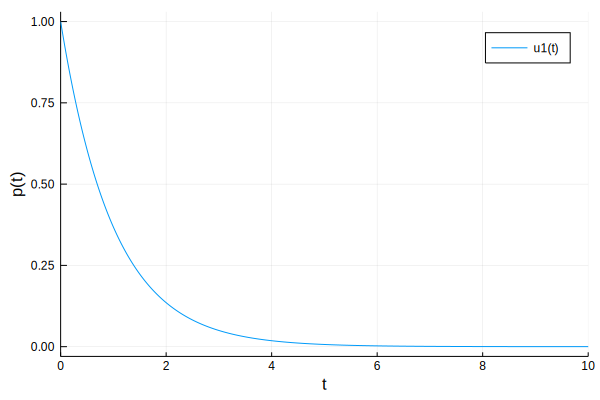

In [7]:
# 4. Solving ODEs

# Standard script to solve ODEs
# using example from 2_introODE_python.ipynb

tspan = (0.0,10.0)
p0 = Float64[1.0]
params = Float64[1.0]

function grads(dxdt_vector,y,params,t)
    p = y[1]
    k = params[1]
    dxdt_vector[1] = -k*p
end

prob = ODEProblem(grads,p0,tspan,params)
sol = solve(prob,CVODE_BDF(),abstol=1e-9,reltol=1e-9)
plot(sol,xaxis="t",yaxis="p(t)") 